### second project : Medical Appointment No Shows 

### Studend Name: `Ahmed Mohamed Ahmed Alghamdi`

### `Describtion project ` 

 - this dataset collects inforamtiom from 100k medical appointments in Brazil and if you want whatch dataset  [Click here ](https://www.kaggle.com/joniarroba/noshowappointments)

- And now we ned ask qustion for this dataset:



###  1- Questions for  the dataset

- What is the gender that does not show up much on a date?
- How Age are those who do not attend their appointment

### 2-  Data Wranngling :

In [1]:
 # import libraries 
    
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load Dataset
appointments =pd.read_csv('appointments.csv',index_col=False)

appointments.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [3]:
# check the data for any missing dataset 
appointments.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

### Gread there are no missing Value 

In [4]:
#check the data for duplicated:
appointments.duplicated().sum()

0

##### I will droping columns  `PatientId` , `AppointmentID`  because it is not useful for the questions dataset

In [5]:
# drop columns : patientId , AppointmentId

appointments.drop(['PatientId','AppointmentID'] , axis=1 , inplace=True)

In [6]:
# here I will change  the type AppointmrntDay for the date 
appointments['AppointmentDay']=pd.to_datetime(appointments['AppointmentDay'])
appointments['AppointmentDay'] = pd.to_datetime(appointments.AppointmentDay.dt.date)

In [7]:
appointments['AppointmentDay'].head()

0   2016-04-29
1   2016-04-29
2   2016-04-29
3   2016-04-29
4   2016-04-29
Name: AppointmentDay, dtype: datetime64[ns]

### And I need do change the value of No-show number ,I will do 1 for Yes and 0 for No

In [8]:
# change the colume  No -show

appointments['No-show'] = appointments['No-show'].map({'Yes': 1, 'No': 0})

In [9]:
appointments.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,M,2016-04-29T16:08:27Z,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,F,2016-04-29T16:19:04Z,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,F,2016-04-29T17:29:31Z,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,F,2016-04-29T16:07:23Z,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0


##  I think finshed the wornagling and I think doing great will

# Here Exploration Data 

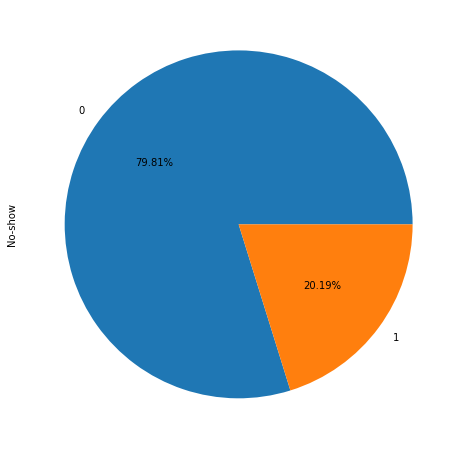

In [10]:
# I will check that  for the colum No-show , '0' if the patient showed up , '1' if the patient  no showed up
appointments['No-show'].value_counts().plot(kind='pie',figsize=(8,8),autopct='%1.2f%%')


####  the color blue they do show in appointment day , I think that nice because more show in appointment day

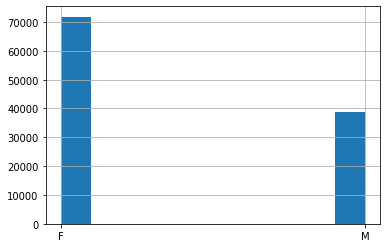

In [25]:
## I will check that whick is more female or male
appointments['Gender'].hist()

### here we see hafe of more  appointments Day for Female

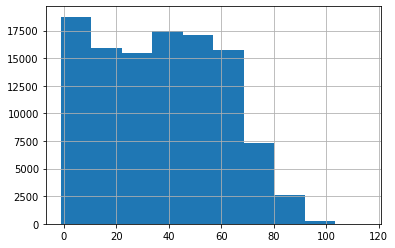

In [27]:
# here , I will show the Age
appointments['Age'].hist()

### here the Age is more Reasonable

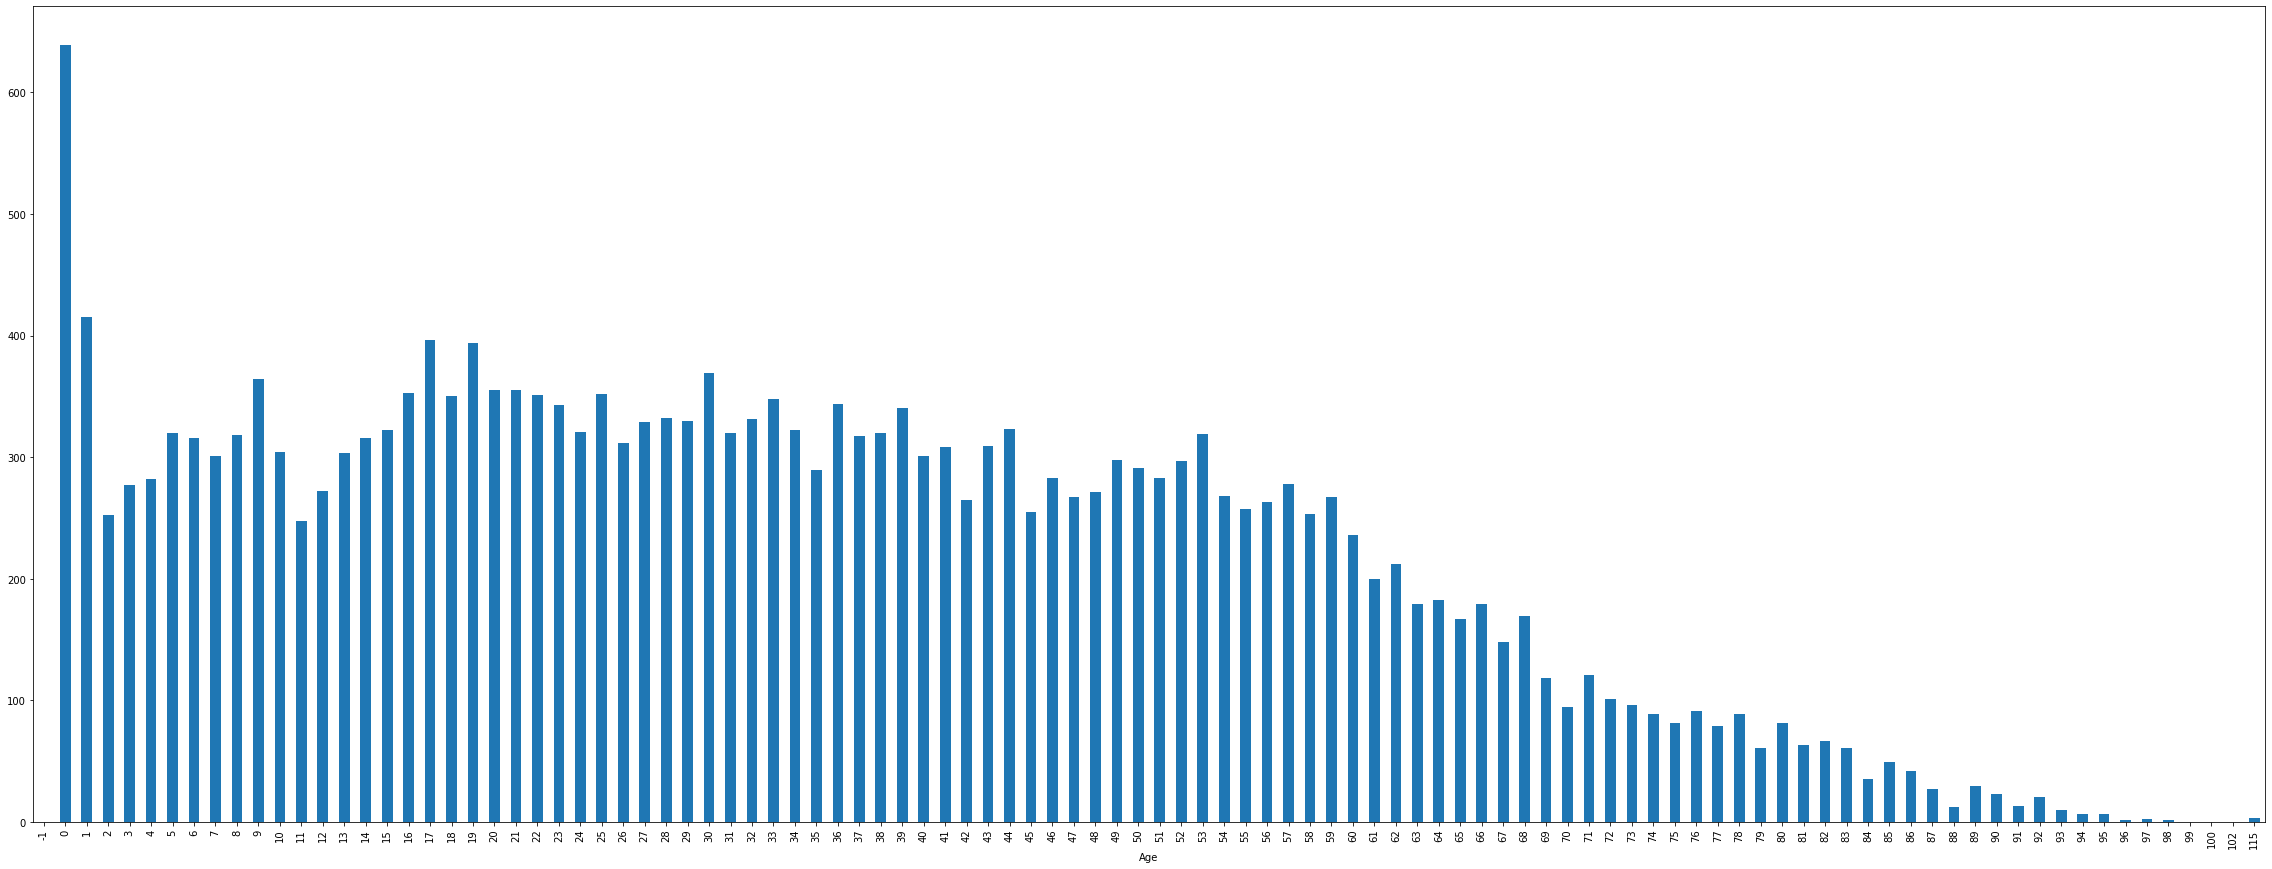

In [30]:
# here I doing groupby Age with No-Show
Age=appointments.groupby('Age').sum()['No-show'].plot.bar(figsize=(40,15))

#### -here almost  young  do not go  appointment
####  -I think young not go in appointment because very in work and busy  for the life  

In [41]:
def collection (x):
    appointments.groupby (x).sum()['No-show'].plot.bar(figsize=(30,15));
    

                                          
    return x                                                                

'Hipertension'

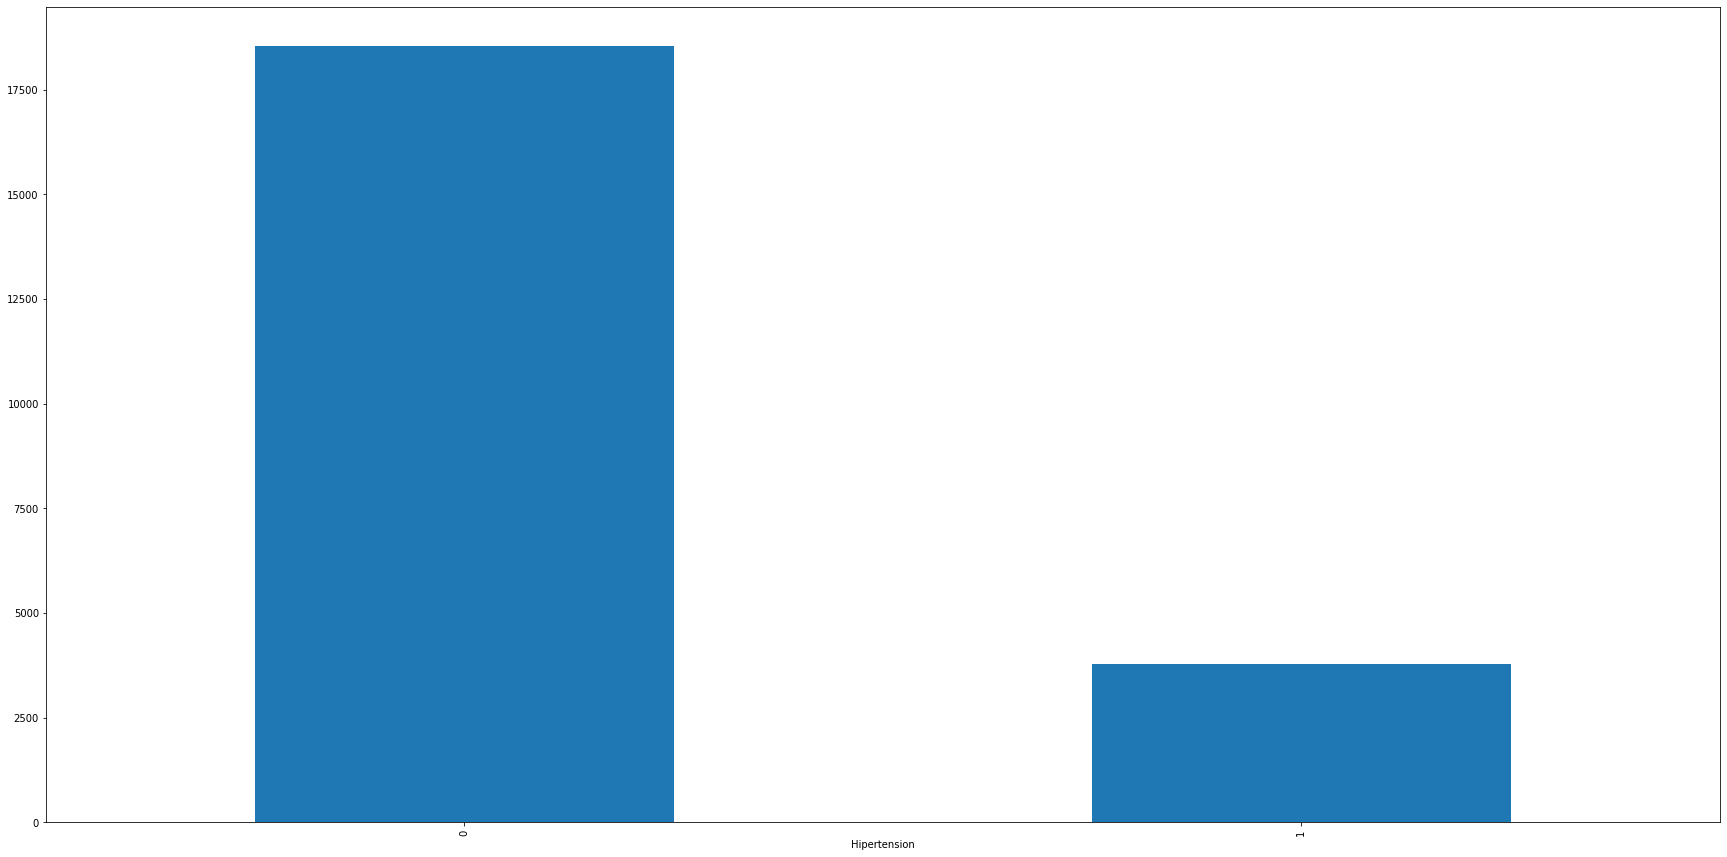

In [42]:
collection('Hipertension')

'Diabetes'

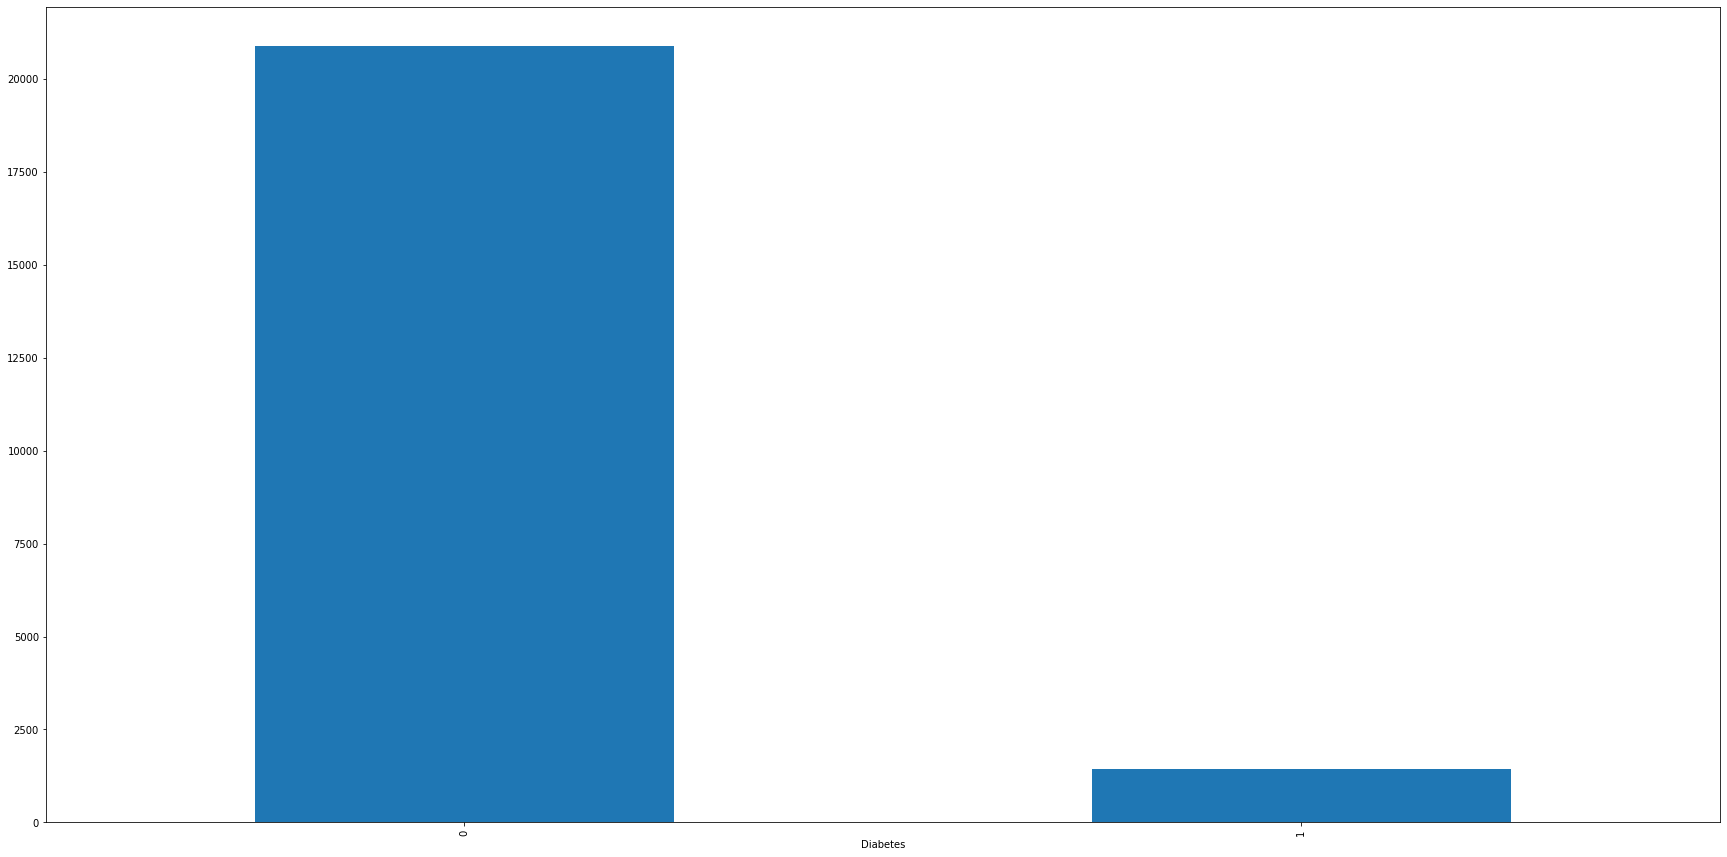

In [43]:
collection('Diabetes')

'Alcoholism'

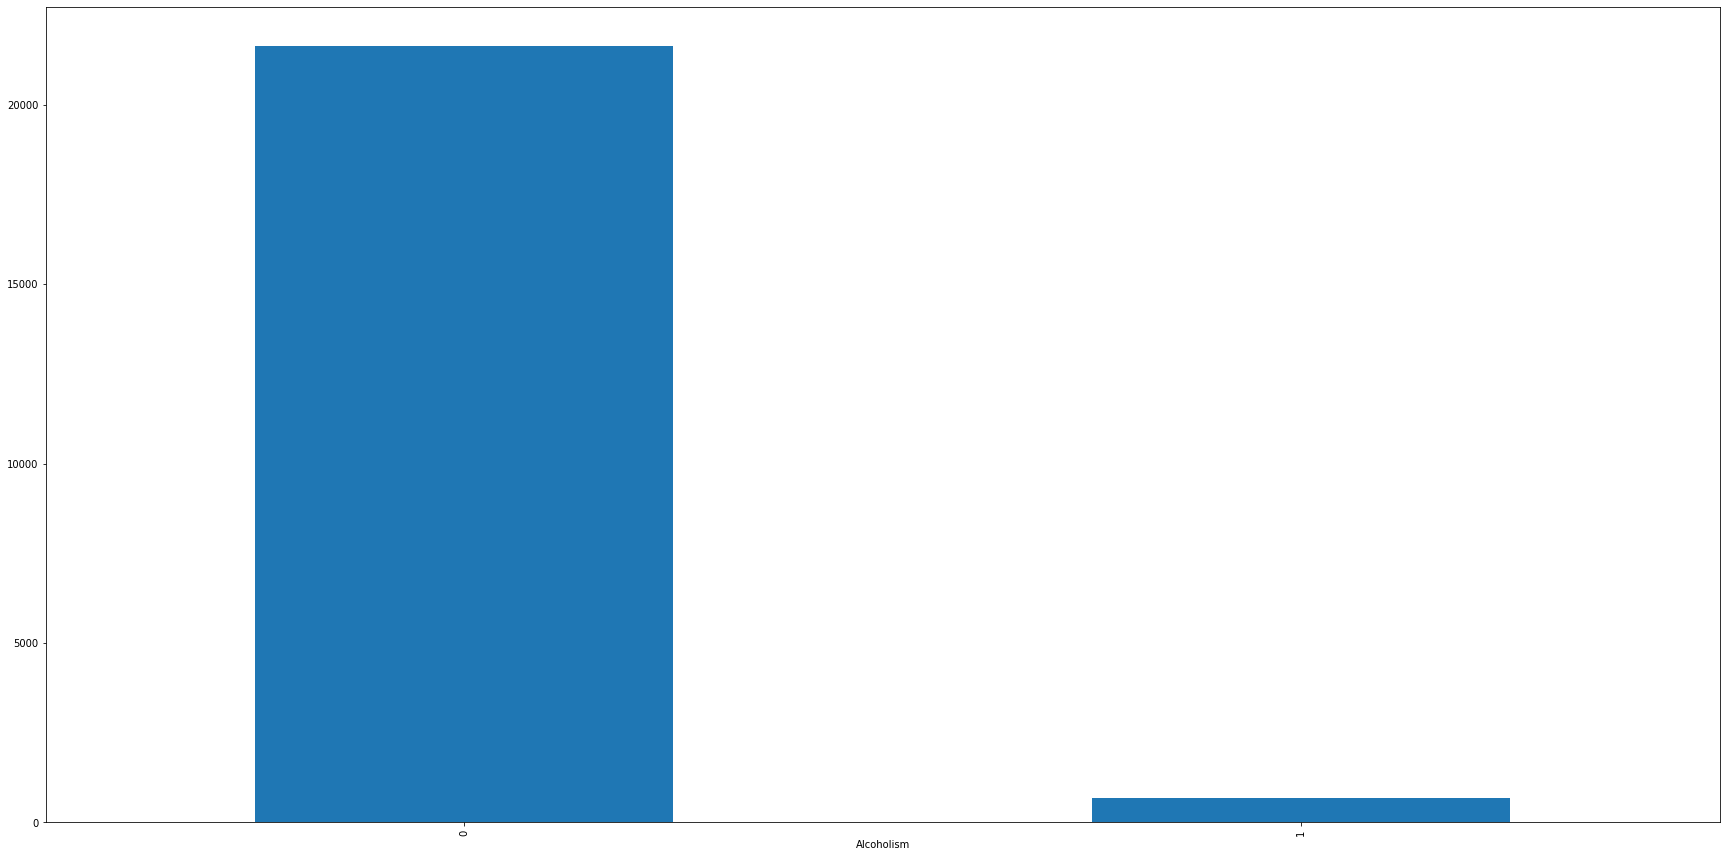

In [44]:
collection('Alcoholism')

'Handcap'

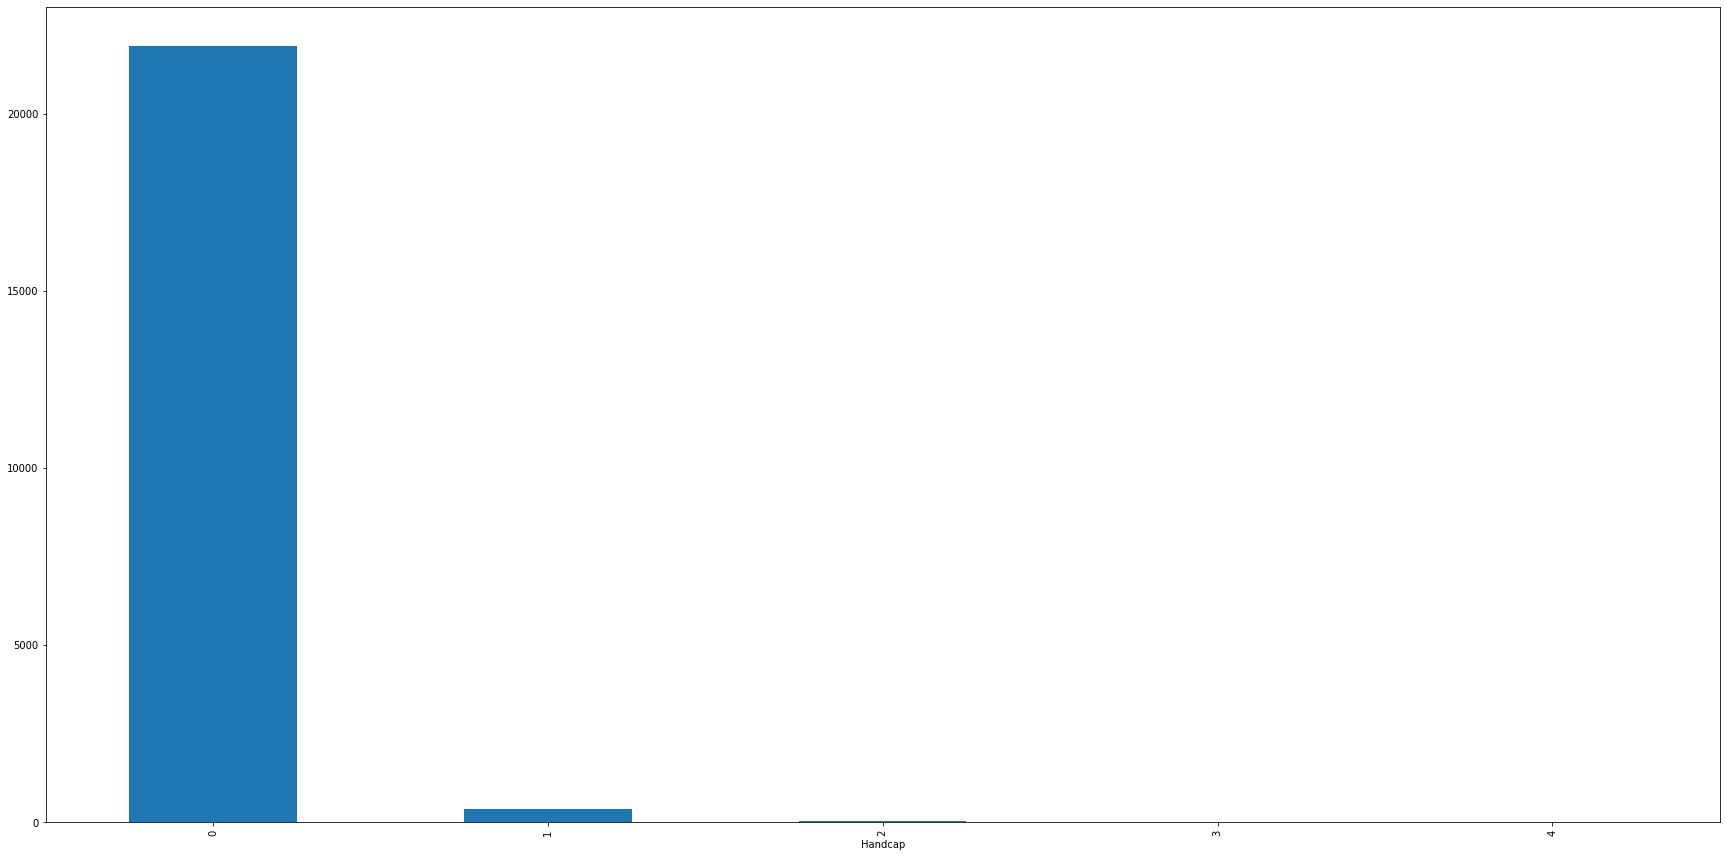

In [45]:
collection('Handcap')

#### here if you look plt (`Hipertension`,`Diabetes`,`Alcoholism`,`Handcap`) here is  almost  they are go  appintment

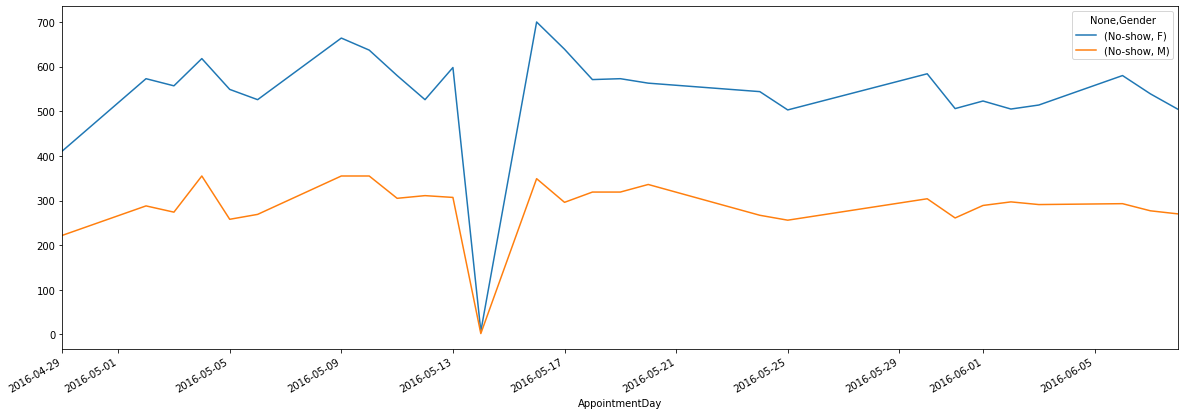

In [58]:
df = appointments.groupby(['AppointmentDay','Gender']).sum()[['No-show']]
# plot data
fig, ax = plt.subplots(figsize=(20,7))
# use unstack()
df.unstack().plot(ax=ax)

#### if we look the plant we see in female more no show in appointment Day

The source that helped me be for doing  this graphic it is site :[https://scentellegher.github.io/programming/2017/07/15/pandas-groupby-multiple-columns-plot.html]

# Conclusions

- finally this phase for data analysis .
- Most who do not go to their appointment the young .
- I think should be We doing awareness of the importance of health . 
- Most of them are women who do not go to the appointment I expect because they work at home or do not have a car .